In [ ]:
import json
from glob import glob

In [ ]:
from collections import defaultdict
def flatten(stats, key):
    res = defaultdict(list)
    for row in stats:
        for k, v in row[key].items():
            res[k].append(v)
    return res


def plot_ratio_actives(results, results_dir):
    ratio_actives = flatten(results['statistics'], 'ratio_active')

    for k,v in ratio_actives.items():
    #     if k in ['all', 'Split1_alt']:
    #         continue
        plt.plot(v, label=k)
    plt.ylabel('Ratio actives')
    plt.xlabel('Iteration')
    plt.legend(loc=2)
    plt.savefig(os.path.join(results_dir, 'ratio_active.png'))
    plt.clf()
    return ratio_actives

def plot_mean_score(results, results_dir):
    mean_score = flatten(results['statistics'], 'mean_pred')

    for k,v in mean_score.items():
    #     if k in ['all', 'Split1_alt']:
    #         continue
        plt.plot(v, label=k)
    plt.ylabel('Mean score')
    plt.xlabel('Iteration')
    plt.legend(loc=2)
    plt.savefig(os.path.join(results_dir, 'mean_score.png'))
    plt.clf()
    return mean_score

import matplotlib
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

def plot_scatter(results, results_dir):
    alpha = 0.3

    scatter_dir = os.path.join(results_dir, 'scatter')
    os.makedirs(scatter_dir, exist_ok=True)


    y_lims = []
    x_lims = []
    ext1_list = []
    ext2_list = []
    pred1_list = []
    pred2_list = []
    
    # run once to get the axes right. Run a second time to actually plot
    for skip in [True, False]:
        if not skip:
            y_low, y_up = list(zip(*y_lims))
            x_low, x_up = list(zip(*x_lims))
            y_low = np.min(y_low)
            x_low = np.min(x_low)
            y_up = np.max(y_up)
            x_up = np.max(x_up)

        for i, row in enumerate(results['statistics']):
            ext1 = results['predictions_external']['Split1']
            ext2 = results['predictions_external']['Split2']
            preds1 = row['preds']['Split1']
            preds2 = row['preds']['Split2']
            
            
            plt.scatter(ext1, ext2, s=3, label="External")
            plt.scatter(preds1, preds2, s=10, label="Optimized")
            plt.axvline(0.5, c='black', alpha=alpha)
            plt.axhline(0.5, c='black',alpha=alpha)
            lim = plt.xlim()


            plt.xlabel('Optimizer score')
            plt.ylabel('Control score')
            plt.legend(loc=2)
            
            if skip:
                y_lims.append(plt.ylim())
                x_lims.append(plt.xlim())
                ext1_list.append(ext1)
                ext2_list.append(ext2)
                pred1_list.append(preds1)
                pred2_list.append(preds2)
                

            if not skip:            
                plt.xlim((x_low, x_up))
                plt.ylim((y_low, y_up))
                plt.plot([x_low, x_up], [x_low, x_up], c='black', alpha=alpha)
                plt.savefig(os.path.join(scatter_dir, f'{i:03}'))

            plt.clf()
    return ext1_list, ext2_list, pred1_list, pred2_list

In [ ]:
ext1_list, ext2_list, pred1_list, pred2_list = plot_scatter(results)

<Figure size 432x288 with 0 Axes>

In [ ]:
def get_preds(results):
    pred1_list = []
    pred2_list = []
    
    ext1 = results['predictions_external']['Split1']
    ext2 = results['predictions_external']['Split2']
    
    for i, row in enumerate(results['statistics']):
        preds1 = row['preds']['Split1']
        preds2 = row['preds']['Split2']
    
        pred1_list.append(preds1)
        pred2_list.append(preds2)
    return ext1, ext2, np.array(pred1_list), np.array(pred2_list)



In [ ]:
import pickle
import os
import matplotlib.pyplot as plt
dirs = glob('results/graph_ga/*')

means = []
ratios = []

pred1_all = []
pred2_all = []
ext1_all = []
ext2_all = []

for results_dir in dirs:
    print(results_dir)
    
    try:
        with open(os.path.join(results_dir, 'results.json'), 'r') as f:
            results = json.load(f)
    except:
        with open(os.path.join(results_dir, 'results.p'), 'rb') as f:
            results = pickle.load(f)
    
    ratio_actives = plot_ratio_actives(results, results_dir)
    mean_score = plot_mean_score(results, results_dir)
    
    means.append(mean_score)
    ratios.append(ratio_actives)
    a, b, c, d = get_preds(results)
    pred1_all.append(c)
    pred2_all.append(d)
    ext1_all.append(a)
    ext2_all.append(b)

results/graph_ga/CHEMBL3888429_2020-02-28_13:18:17
results/graph_ga/CHEMBL3888429_2020-02-28_13:47:52
results/graph_ga/CHEMBL3888429_2020-02-28_12:54:01
results/graph_ga/CHEMBL3888429_2020-02-28_11:56:05
results/graph_ga/CHEMBL3888429_2020-02-28_13:54:38
results/graph_ga/CHEMBL3888429_2020-02-28_13:00:32


<Figure size 432x288 with 0 Axes>

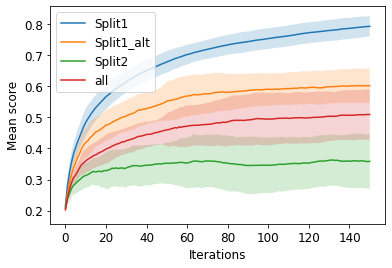

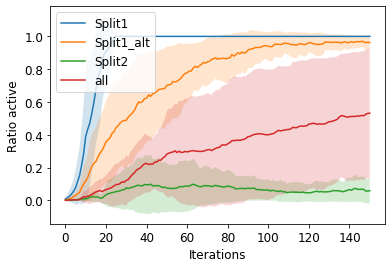

In [ ]:
import numpy as np
def plot_spread(means, ylabel, xlabel='Iterations'):
    means_order = defaultdict(list)
    for m in means:
        for k,v in m.items():
            means_order[k].append(v)

    for k in means_order.keys():
        means_order[k] = np.array(means_order[k])
        
    for k, v in means_order.items():
        m = v.mean(0)
        s = v.std(0)
        plt.plot(m, label=k)
        plt.fill_between(np.arange(m.shape[0]), m-s, m+s, alpha=0.2)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)
    plt.show()

plot_spread(means, 'Mean score')
plot_spread(ratios, 'Ratio active')

In [ ]:
alpha=0.2
pred1_all = np.array(pred1_all)
pred2_all = np.array(pred2_all)
ext1_all = np.array(ext1_all)
ext2_all = np.array(ext2_all)
print(pred1_all.shape)

n_ext = 1000


for it in range(pred1_all.shape[1]):
    for run in range(pred1_all.shape[0]):
        plt.scatter(ext1_all[run][:n_ext], ext2_all[run][:n_ext], s=1, c='black', alpha=0.2)
        plt.scatter(pred1_all[run, it], pred2_all[run, it], s=6)

        plt.axvline(0.5, c='black', alpha=alpha)
        plt.axhline(0.5, c='black',alpha=alpha)
        lim = plt.xlim()


        plt.xlabel('Optimizer score')
        plt.ylabel('Control score')
#         plt.legend(loc=2)

    plt.plot([0,1], [0,1], c='black', alpha=0.3)
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.savefig(os.path.join('scatter', f'{it:03}'))
    plt.clf()

(6, 151, 100)


<Figure size 432x288 with 0 Axes>